<a href="https://colab.research.google.com/github/ayyucedemirbas/machine_learning_algorithms/blob/master/AustinAnimalCenter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
  
dfIntakes = pd.read_csv('https://raw.githubusercontent.com/ayyucedemirbas/machine_learning_algorithms/master/Austin_Animal_Center_Intakes.csv')

dfOutcomes = pd.read_csv('https://raw.githubusercontent.com/ayyucedemirbas/machine_learning_algorithms/master/Austin_Animal_Center_Outcomes.csv')

df= pd.concat([dfIntakes, dfOutcomes], ignore_index=True)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (243627, 17)


In [54]:
df.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,NaN,NaN,NaN,NaN,NaN
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,NaN,NaN,NaN,NaN,NaN
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,NaN,NaN,NaN,NaN,NaN
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,NaN,NaN,NaN,NaN,NaN
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,NaN,NaN,NaN,NaN,NaN


In [55]:
df['Date of Birth'] = df['Date of Birth'].fillna(0)
df['Outcome Type'] = df['Outcome Type'].fillna(0)
df['Outcome Subtype'] = df['Outcome Subtype'].fillna(0)
df['Sex upon Outcome'] = df['Sex upon Outcome'].fillna(0)
df['Age upon Outcome'] = df['Age upon Outcome'].fillna(0)
df.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,0,0,0,0,0
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,0,0,0,0,0
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,0,0,0,0,0
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,0,0,0,0,0
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,0,0,0,0,0


In [56]:
df['Outcome Type'].unique()

array([0, 'Rto-Adopt', 'Adoption', 'Transfer', 'Return to Owner',
       'Euthanasia', 'Died', 'Disposal', 'Missing', 'Relocate'],
      dtype=object)

In [57]:
myFuckingmap = {'Rto-Adopt':1, 'Adoption':2, 'Transfer':3, 'Return to Owner':4, 'Euthanasia':5, 'Died':6, 'Disposal':7, 'Missing':8, 'Relocate':9}


In [58]:
df=df.applymap(lambda s: myFuckingmap.get(s) if s in myFuckingmap else s)

In [59]:
df

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,0,0,0,0,0
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,0,0,0,0,0
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,0,0,0,0,0
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,0,0,0,0,0
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243622,A825308,NaN,11/02/2020 09:08:00 AM,11/02/2020 09:08:00 AM,NaN,NaN,NaN,Other,NaN,NaN,Bat,Brown,11/01/2018,5,Rabies Risk,Unknown,2 years
243623,A825313,NaN,11/02/2020 09:02:00 AM,11/02/2020 09:02:00 AM,NaN,NaN,NaN,Other,NaN,NaN,Bat,Brown,11/01/2019,5,Rabies Risk,Unknown,1 year
243624,A825314,NaN,11/02/2020 09:04:00 AM,11/02/2020 09:04:00 AM,NaN,NaN,NaN,Other,NaN,NaN,Bat,Brown,11/01/2019,7,0,Unknown,1 year
243625,A825315,NaN,11/02/2020 09:02:00 AM,11/02/2020 09:02:00 AM,NaN,NaN,NaN,Other,NaN,NaN,Bat,Brown,11/01/2019,7,0,Unknown,1 year


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243627 entries, 0 to 243626
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         243627 non-null  object
 1   Name              166897 non-null  object
 2   DateTime          243627 non-null  object
 3   MonthYear         243627 non-null  object
 4   Found Location    121855 non-null  object
 5   Intake Type       121855 non-null  object
 6   Intake Condition  121855 non-null  object
 7   Animal Type       243627 non-null  object
 8   Sex upon Intake   121854 non-null  object
 9   Age upon Intake   121788 non-null  object
 10  Breed             243627 non-null  object
 11  Color             243627 non-null  object
 12  Date of Birth     243627 non-null  object
 13  Outcome Type      243627 non-null  int64 
 14  Outcome Subtype   243627 non-null  object
 15  Sex upon Outcome  243627 non-null  object
 16  Age upon Outcome  243627 non-null  obj

In [18]:
"""fuck = pd.Series(df['Outcome Type'])

pd.to_numeric(fuck)"""

0         0
1         0
2         0
3         0
4         0
         ..
243622    5
243623    5
243624    7
243625    7
243626    5
Name: Outcome Type, Length: 243627, dtype: int64

In [61]:
df['Outcome Type'].dtypes


dtype('int64')

In [62]:
df.describe()

,Outcome Type
count,243627.000000
mean,1.452347
std,1.627424
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,9.000000


In [63]:
print(df.columns)

Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Found Location',
       'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake',
       'Age upon Intake', 'Breed', 'Color', 'Date of Birth', 'Outcome Type',
       'Outcome Subtype', 'Sex upon Outcome', 'Age upon Outcome'],
      dtype='object')


In [64]:
model_features = df.columns.drop('Outcome Type')
model_target = 'Outcome Type'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Found Location',
       'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake',
       'Age upon Intake', 'Breed', 'Color', 'Date of Birth', 'Outcome Subtype',
       'Sex upon Outcome', 'Age upon Outcome'],
      dtype='object')
Model target:  Outcome Type


In [65]:
import numpy as np
numerical_features_all = df.select_dtypes(include=['int64']).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)

Numerical columns: Index(['Outcome Type'], dtype='object')

Categorical columns: Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Found Location',
       'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake',
       'Age upon Intake', 'Breed', 'Color', 'Date of Birth', 'Outcome Subtype',
       'Sex upon Outcome', 'Age upon Outcome'],
      dtype='object')


In [66]:
df[model_target].value_counts()

0    121860
2     53844
3     36079
4     21174
5      8230
6      1139
1       665
7       548
8        67
9        21
Name: Outcome Type, dtype: int64

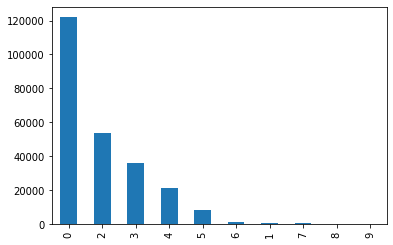

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

df[model_target].value_counts().plot.bar()
plt.show()

In [68]:
for c in categorical_features_all: 
    print(df[c].value_counts())

A721033    66
A718223    28
A718877    24
A706536    22
A616444    18
           ..
A663809     1
A660596     1
A817906     1
A660604     1
A822744     1
Name: Animal ID, Length: 109769, dtype: int64
Max             1094
Bella           1031
Luna             948
Rocky            745
Daisy            722
                ... 
*Mr Popcorn        1
Topi               1
*Yahtzee           1
Zazzy              1
*Skellington       1
Name: Name, Length: 19561, dtype: int64
09/23/2016 12:00:00 PM    64
07/09/2014 12:58:00 PM    63
09/01/2017 02:47:00 PM    59
02/19/2014 01:51:00 PM    49
02/14/2016 04:02:00 PM    45
                          ..
09/22/2017 11:16:00 AM     1
03/17/2014 03:19:00 PM     1
09/04/2017 02:47:00 PM     1
01/30/2019 06:17:00 PM     1
08/11/2018 02:46:00 PM     1
Name: DateTime, Length: 181316, dtype: int64
09/23/2016 12:00:00 PM    64
07/09/2014 12:58:00 PM    63
09/01/2017 02:47:00 PM    59
02/19/2014 01:51:00 PM    49
02/14/2016 04:02:00 PM    45
                    

Intake Type


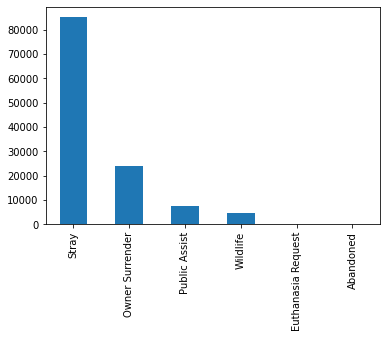

Intake Condition


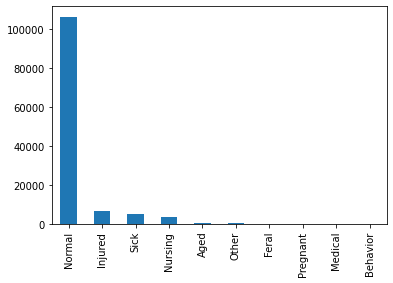

Animal Type


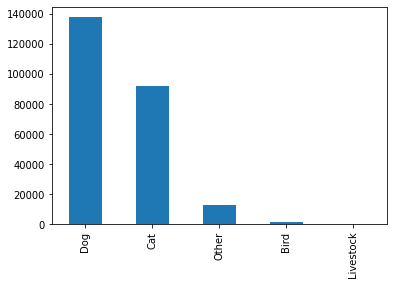

Sex upon Intake


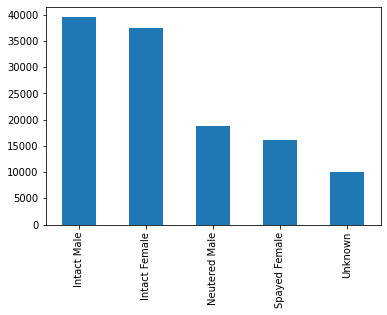

Outcome Subtype


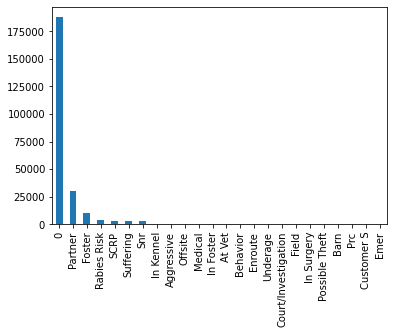

Sex upon Outcome


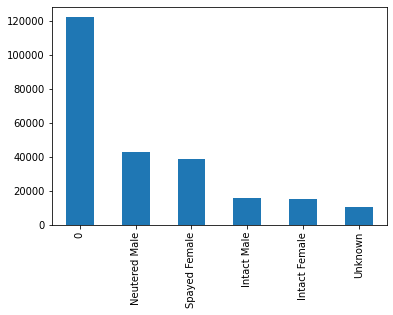

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in categorical_features_all:
    if len(df[c].value_counts()) < 50:
        print(c)
        df[c].value_counts().plot.bar()
        plt.show()

Outcome Type


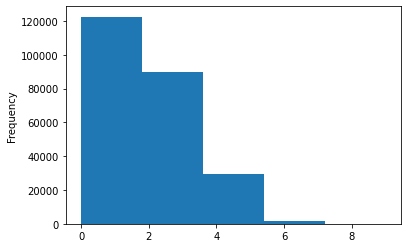

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()

In [71]:
for c in numerical_features_all:
    print(c)
    print('min:', df[c].min(), 'max:', df[c].max())

Outcome Type
min: 0 max: 9


In [72]:
for c in numerical_features_all: 
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

Outcome Type
(-0.009999999999999998, 0.9]    121860
(0.9, 1.8]                         665
(1.8, 2.7]                       53844
(2.7, 3.6]                       36079
(3.6, 4.5]                       21174
(4.5, 5.4]                        8230
(5.4, 6.3]                        1139
(6.3, 7.2]                         548
(7.2, 8.1]                          67
(8.1, 9.0]                          21
Name: Outcome Type, dtype: int64


In [73]:
for c in numerical_features_all:
    print(c)
    
    # Drop values below Q1 - 1.5 IQR and beyond Q3 + 1.5 IQR
    #Q1 = df[c].quantile(0.25)
    #Q3 = df[c].quantile(0.75)
    #IQR = Q3 - Q1
    #print (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
    
    #dropIndexes = df[df[c] > Q3 + 1.5*IQR].index
    #df.drop(dropIndexes , inplace=True)
    #dropIndexes = df[df[c] < Q1 - 1.5*IQR].index
    #df.drop(dropIndexes , inplace=True)
    
    # Drop values beyond 90% of max()
    dropIndexes = df[df[c] > df[c].max()*9/10].index
    df.drop(dropIndexes , inplace=True)

Outcome Type


In [74]:
for c in numerical_features_all:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

Outcome Type
(-0.009000000000000001, 0.8]    121860
(0.8, 1.6]                         665
(1.6, 2.4]                       53844
(2.4, 3.2]                       36079
(3.2, 4.0]                       21174
(4.0, 4.8]                           0
(4.8, 5.6]                        8230
(5.6, 6.4]                        1139
(6.4, 7.2]                         548
(7.2, 8.0]                          67
Name: Outcome Type, dtype: int64


Outcome Type


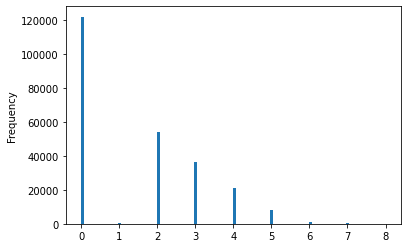

In [77]:
for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=100)
    plt.show()